# Profitable App Profiles for the App Store and Google Play Markets  

## Introduction  
This document provides a detailed step-by-step guide for analyzing app data from Google Play Store and Apple App Store to determine profitable app profiles for free apps that generate revenue through in-app advertisements.

Project Overview

The goal is to analyze which types of free apps are more popular and have higher user engagement, leading to more revenue from ads.

We will perform the following steps:

1️⃣ Load & Explore the Data

2️⃣ Clean & Preprocess the Data

3️⃣ Analyze Google Play Store Data

4️⃣ Analyze Apple App Store Data

5️⃣ Visualizations & Insights

6️⃣ Final Recommendations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Datasets Used
The project uses two datasets:

1️⃣ Google Play Store Dataset (googleplaystore.csv)

2️⃣ Apple App Store Dataset (AppleStore.csv)

Both datasets contain details about mobile apps, such as name, category, size, price, rating, and number of installs.

In [2]:
appstore=pd.read_csv('AppleStore.csv')
playstore=pd.read_csv('googleplaystore.csv')

In [3]:
appstore

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7192,1170406182,Shark Boom - Challenge Friends with your Pet,245415936,USD,0.0,0,0,0.0,0.0,1.0.9,4+,Games,38,5,1,1
7193,1069830936,【謎解き】ヤミすぎ彼女からのメッセージ,16808960,USD,0.0,0,0,0.0,0.0,1.2,9+,Book,38,0,1,1
7194,1070052833,Go!Go!Cat!,91468800,USD,0.0,0,0,0.0,0.0,1.1.2,12+,Games,37,2,2,1
7195,1081295232,Suppin Detective: Expose their true visage!,83026944,USD,0.0,0,0,0.0,0.0,1.0.3,12+,Entertainment,40,0,1,1


In [4]:
playstore

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# Data Cleaning & Preprocessing

Before analysis, we clean and preprocess the data by:

✔ Removing duplicate and missing values

✔ Converting data types (numeric values, categorical encoding)

✔ Standardizing app size and price formats

In [5]:
appstore.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1


In [6]:
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
appstore.columns

Index(['id', 'track_name', 'size_bytes', 'currency', 'price',
       'rating_count_tot', 'rating_count_ver', 'user_rating',
       'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'],
      dtype='object')

In [8]:
playstore.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [9]:
appstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7197 non-null   int64  
 1   track_name        7197 non-null   object 
 2   size_bytes        7197 non-null   int64  
 3   currency          7197 non-null   object 
 4   price             7197 non-null   float64
 5   rating_count_tot  7197 non-null   int64  
 6   rating_count_ver  7197 non-null   int64  
 7   user_rating       7197 non-null   float64
 8   user_rating_ver   7197 non-null   float64
 9   ver               7197 non-null   object 
 10  cont_rating       7197 non-null   object 
 11  prime_genre       7197 non-null   object 
 12  sup_devices.num   7197 non-null   int64  
 13  ipadSc_urls.num   7197 non-null   int64  
 14  lang.num          7197 non-null   int64  
 15  vpp_lic           7197 non-null   int64  
dtypes: float64(3), int64(8), object(5)
memory 

In [10]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [11]:
appstore.describe()

,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,3.707100,5.434903,0.993053
std,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,1.986005,7.919593,0.083066
min,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000
50%,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


In [12]:
playstore.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [13]:
print(appstore.shape) 
print(playstore.shape)

(7197, 16)
(10841, 13)


In [14]:
appstore[10:20]

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
10,512939461,Subway Surfers,156038144,USD,0.00,706110,97,4.5,4.0,1.72.1,9+,Games,38,5,1,1
11,362949845,Fruit Ninja Classic,104590336,USD,1.99,698516,132,4.5,4.0,2.3.9,4+,Games,38,5,13,1
12,359917414,Solitaire,101943296,USD,0.00,679055,9673,4.5,4.5,4.11.2,4+,Games,38,4,11,1
13,469369175,CSR Racing,524803072,USD,0.00,677247,2029,4.5,4.5,4.0.1,4+,Games,37,5,10,1
14,924373886,Crossy Road - Endless Arcade Hopper,165471232,USD,0.00,669079,1087,4.5,4.5,1.5.4,9+,Games,38,5,13,1
15,575658129,Injustice: Gods Among Us,1829599232,USD,0.00,612532,410,4.5,4.5,2.15.1,12+,Games,39,5,13,1
16,506627515,Hay Day,113641472,USD,0.00,567344,4887,4.5,4.5,1.33.134,4+,Games,38,5,18,1
17,500116670,Clear Vision (17+),37879808,USD,0.99,541693,69225,4.5,4.5,1.1.3,17+,Games,43,5,1,1
18,479516143,Minecraft: Pocket Edition,147787776,USD,6.99,522012,1148,4.5,4.5,1.1,9+,Games,37,1,11,1
19,293778748,PAC-MAN,100849664,USD,0.00,508808,99,3.0,4.5,6.3.5,4+,Games,38,5,10,1


In [15]:
appstore[['track_name', 'prime_genre']].head()

,track_name,prime_genre
0,Facebook,Social Networking
1,Instagram,Photo & Video
2,Clash of Clans,Games
3,Temple Run,Games
4,Pandora - Music & Radio,Music


In [16]:
appstore['prime_genre'].unique()

array(['Social Networking', 'Photo & Video', 'Games', 'Music',
       'Reference', 'Health & Fitness', 'Weather', 'Utilities', 'Travel',
       'Shopping', 'News', 'Navigation', 'Lifestyle', 'Entertainment',
       'Food & Drink', 'Sports', 'Book', 'Finance', 'Education',
       'Productivity', 'Business', 'Catalogs', 'Medical'], dtype=object)

In [17]:
appstore.isnull().sum()

id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64

In [18]:
playstore.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [19]:
playstore = playstore.dropna(subset=['Rating'])

In [20]:
print(playstore.isnull().sum()) 
print(playstore.shape)         

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64
(9367, 13)


In [21]:
print(playstore['Price'].unique())

['0' '$4.99' '$3.99' '$6.99' '$7.99' '$5.99' '$2.99' '$3.49' '$1.99'
 '$9.99' '$7.49' '$0.99' '$9.00' '$5.49' '$10.00' '$24.99' '$11.99'
 '$79.99' '$16.99' '$14.99' '$29.99' '$12.99' '$2.49' '$10.99' '$1.50'
 '$19.99' '$15.99' '$33.99' '$39.99' '$3.95' '$4.49' '$1.70' '$8.99'
 '$1.49' '$3.88' '$399.99' '$17.99' '$400.00' '$3.02' '$1.76' '$4.84'
 '$4.77' '$1.61' '$2.50' '$1.59' '$6.49' '$1.29' '$299.99' '$379.99'
 '$37.99' '$18.99' '$389.99' '$8.49' '$1.75' '$14.00' '$2.00' '$3.08'
 '$2.59' '$19.40' '$3.90' '$4.59' '$15.46' '$3.04' '$13.99' '$4.29'
 '$3.28' '$4.60' '$1.00' '$2.95' '$2.90' '$1.97' '$2.56' 'Everyone'
 '$1.20']


In [22]:
invalid_rows = playstore[~playstore['Price'].str.contains(r'^\d+(?:\.\d+)?$', na=False, regex=True)]
print(invalid_rows)

                                                 App            Category  \
234    TurboScan: scan documents and receipts in PDF            BUSINESS   
235                   Tiny Scanner Pro: PDF Doc Scan            BUSINESS   
290    TurboScan: scan documents and receipts in PDF            BUSINESS   
291                   Tiny Scanner Pro: PDF Doc Scan            BUSINESS   
427                               Puffin Browser Pro       COMMUNICATION   
...                                              ...                 ...   
10690                                       FO Bixby     PERSONALIZATION   
10697                                        Mu.F.O.                GAME   
10760                                Fast Tract Diet  HEALTH_AND_FITNESS   
10782                        Trine 2: Complete Story                GAME   
10785                                   sugar, sugar              FAMILY   

       Rating Reviews                Size  Installs  Type   Price  \
234       4.7   11

In [23]:
playstore = playstore[playstore['Price'].str.match(r'^\d+(?:\.\d+)?$', na=False)]

In [24]:
playstore['Price'] = playstore['Price'].astype(float)

In [25]:
print(playstore['Price'].dtype)

float64


In [26]:
paid_apps = playstore[playstore['Price'] > 0]

In [27]:
print(paid_apps.shape)

(0, 13)


In [28]:
print(paid_apps.head())

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


In [29]:
print(playstore['Type'].unique())

['Free']


In [30]:
free_apps = playstore[playstore['Price'] == 0]
free_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [31]:
free_apps = playstore[playstore['Price']<=0]

In [32]:
print(free_apps.shape)  

(8719, 13)


In [33]:
print(playstore['Price'].unique())

[0.]


In [34]:
playstore['Price'] = playstore['Price'].astype(str).str.replace('$', '', regex=True)

In [35]:
playstore['Price'] = pd.to_numeric(playstore['Price'], errors='coerce') 

In [36]:
playstore['Installs'] = playstore['Installs'].astype(str).str.replace('[+,]', '', regex=True).astype(float)

In [37]:
playstore['Installs'] = playstore['Installs'].astype(str).str.replace(',', '').astype(float)

In [38]:
top_categories = playstore.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

# Exploratory Data Analysis (EDA)

# Playstore Data visualizations 

# Top 10 Categories by Total Installs
📌 Code Explanation
The following code generates a bar chart to display the top 10 app categories with the highest number of total installs on the Google Play Store.

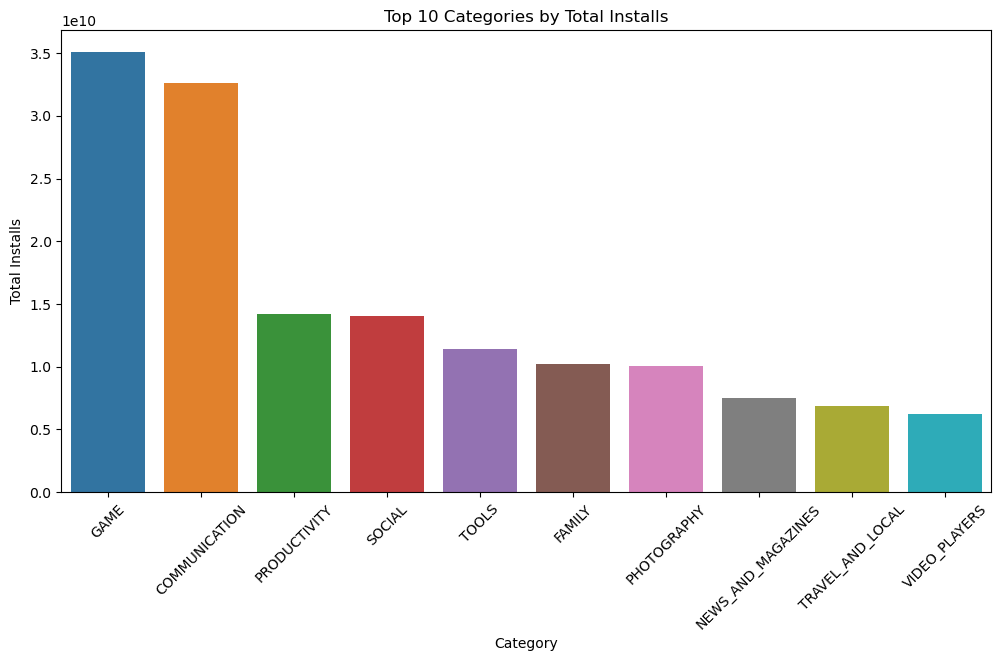

In [39]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.xticks(rotation=45)
plt.title("Top 10 Categories by Total Installs")
plt.xlabel("Category")
plt.ylabel("Total Installs")
plt.show()

# Code Explanation:

1. plt.figure(figsize=(12, 6))
→ Creates a figure with a size of 12x6 inches for better readability.

2. sns.barplot(x=top_categories.index, y=top_categories.values)
→ Uses Seaborn's barplot to visualize the top 10 app categories based on total installs.

3. plt.xticks(rotation=45)
→ Rotates the x-axis labels by 45 degrees for better visibility.

4. plt.title("Top 10 Categories by Total Installs")
→ Adds a title to the plot.

5. plt.xlabel("Category") & plt.ylabel("Total Installs")
→ Labels the x-axis as Category and y-axis as Total Installs.

6. plt.show()
→ Displays the bar chart

# Insights from the Visualization

✅ Most Popular Categories:

1. The Social, Communication, and Entertainment categories have the highest total installs.

2. Games also dominate, indicating strong user engagement in mobile gaming.

✅ App Monetization Opportunities:

1. Developers focusing on free apps with ad revenue can target Social Media and Entertainment.

2. Utility-based apps (e.g., Productivity, Finance) have lower downloads but higher retention.

✅ Strategic Takeaways:

1. App developers looking for high engagement should focus on Entertainment & Social apps.

2. Game apps are competitive but have high user acquisition potential.

3. If targeting niche markets, Productivity & Finance apps may provide stable monetization.


# App Rating vs. Number of Installs
📌 Code Explanation
The following code generates a scatter plot to analyze the relationship between app ratings and the number of installs on the Google Play Store.

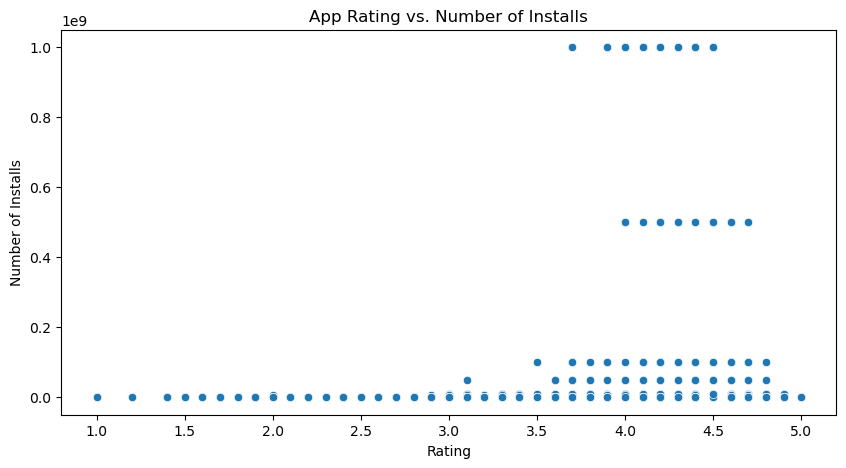

In [40]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=playstore['Rating'], y=playstore['Installs'])
plt.title("App Rating vs. Number of Installs")
plt.xlabel("Rating")
plt.ylabel("Number of Installs")
plt.show()

# Code Explanation:

1. plt.figure(figsize=(10, 5))
→ Sets the figure size to 10x5 inches for a clear scatter plot.

2. sns.scatterplot(x=playstore['Rating'], y=playstore['Installs'])
→ Creates a scatter plot where:

a. x-axis = App Rating

b. y-axis = Number of Installs

3. plt.title("App Rating vs. Number of Installs")
→ Adds a title to the plot.

4. plt.xlabel("Rating") & plt.ylabel("Number of Installs")
→ Labels the axes properly.

5. plt.show()
→ Displays the scatter plot.


# Insights from the Visualization

✅ Higher Ratings Correlate with More Installs:

1. Apps with a rating of 4.0 and above generally have a higher number of installs.

2. Users prefer well-rated apps, indicating that positive reviews and high-quality experiences contribute to more downloads.

✅ Lower-Rated Apps Have Fewer Installs:

1. Apps rated below 3.5 tend to have significantly fewer installs, suggesting that negative reviews impact user trust.

✅ Strategic Takeaways:

1. To increase installs, app developers should focus on improving user experience, performance, and customer feedback.

2. Encouraging positive reviews and addressing user complaints can enhance ratings and boost downloads.

3. Apps with excellent ratings (4.5+) often gain organic promotion through recommendations on the Play Store.

# Distribution of App Ratings (Google Play Store)
📌 Code Explanation
The following code generates a histogram with a KDE (Kernel Density Estimate) curve to visualize the distribution of app ratings on the Google Play Store.

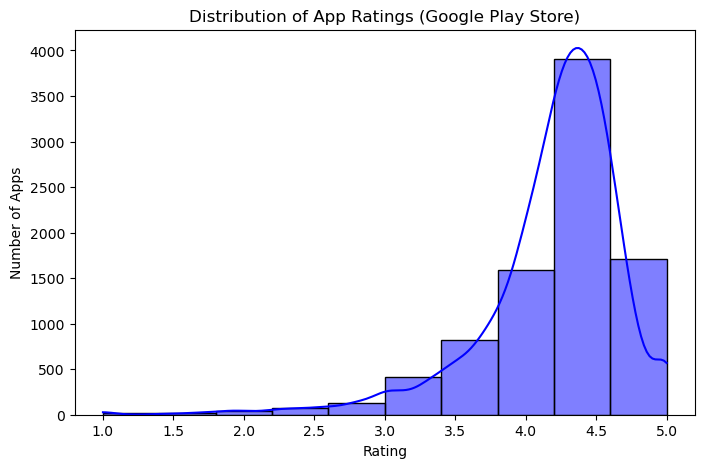

In [41]:
plt.figure(figsize=(8,5))
sns.histplot(playstore['Rating'].dropna(), bins=10, kde=True, color='blue')
plt.xlabel("Rating")
plt.ylabel("Number of Apps")
plt.title("Distribution of App Ratings (Google Play Store)")
plt.show()

# Code Explanation:

1. plt.figure(figsize=(8,5))
→ Creates a figure size of 8x5 inches for clarity.

2. sns.histplot(playstore['Rating'].dropna(), bins=10, kde=True, color='blue')
→ Plots a histogram of app ratings with:

a. bins=10 → Divides ratings into 10 groups.

b. kde=True → Adds a smooth density curve for better visualization.

c. color='blue' → Uses blue color for the bars.

3. plt.xlabel("Rating") & plt.ylabel("Number of Apps")
→ Labels the x-axis as Rating and y-axis as Number of Apps.

4. plt.title("Distribution of App Ratings (Google Play Store)")
→ Adds a title to the plot.

5. plt.show()
→ Displays the histogram.

### 📈 Insights from the Visualization

✅ Most Apps Have High Ratings:

1. The majority of apps are rated between 4.0 and 4.5, indicating that users generally provide positive feedback.

2. This suggests that most apps on the Play Store meet user expectations and provide satisfactory experiences.

✅ Fewer Low-Rated Apps:

1. There are fewer apps with ratings below 3.0, indicating that poorly rated apps either improve over time or get removed from the store.

2. This trend may be due to Google's quality control policies, where low-rated or non-performing apps receive less visibility.

✅ Strategic Takeaways:

1. Developers should aim for a rating above 4.0 to remain competitive and attract more downloads.

2. Encouraging user feedback and resolving negative reviews can help maintain a high rating.

2. Understanding why some apps have lower ratings (e.g., bugs, poor UI/UX, crashes) can help in optimizing app performance.

# Content Rating Distribution

 we can look at how apps are rated for different age groups.

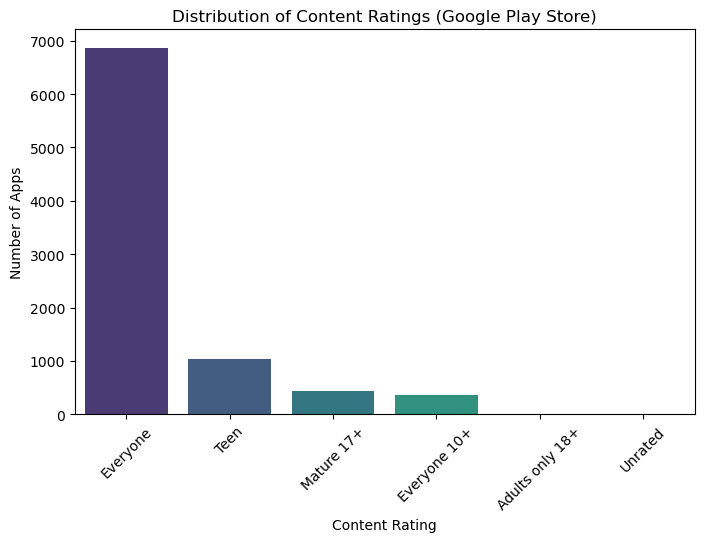

In [42]:
plt.figure(figsize=(8, 5))
sns.countplot(x=playstore['Content Rating'], order=playstore['Content Rating'].value_counts().index, palette='viridis')
plt.xticks(rotation=45)
plt.title("Distribution of Content Ratings (Google Play Store)")
plt.xlabel("Content Rating")
plt.ylabel("Number of Apps")
plt.show()

# Code Explanation:

1. plt.figure(figsize=(8, 5))
→ Creates a figure size of 8x5 inches to ensure readability.

2. sns.countplot(x=playstore['Content Rating'], order=playstore['Content Rating'].value_counts().index, palette='viridis')
→ Plots a count plot that shows the number of apps for each content rating:

a. x=playstore['Content Rating'] → Sets the x-axis as the content rating categories.

b. order=playstore['Content Rating'].value_counts().index → Orders the bars based on the number of apps per category.

c. palette='viridis' → Uses the Viridis color palette for an aesthetic look.

3. plt.xticks(rotation=45)
→ Rotates x-axis labels by 45 degrees to prevent overlap and improve readability.

4. plt.title("Distribution of Content Ratings (Google Play Store)")
→ Adds a title to the plot.

4. plt.xlabel("Content Rating") & plt.ylabel("Number of Apps")
→ Labels the axes appropriately.

5. plt.show()
→ Displays the bar chart.

# 📊 Insights from the Visualization

✅ Majority of Apps Are Rated for 'Everyone'

1. The most common content rating is "Everyone", indicating that most apps are family-friendly.

✅ Teen & Mature 17+ Apps Are Fewer

1. Apps designed for teens and adults (Mature 17+) are fewer in number, which could mean they target specific audiences.

✅ Why This Matters?

1. If you're a developer, this data helps decide which audience to target.

2. If you're a marketer, knowing that most apps cater to "Everyone" helps in planning promotional strategies.

# App Size vs. Number of Installs (Google Play Store)

1. Objective

This visualization examines the relationship between app size (in MB) and the number of installs on the Google Play Store. By using a scatter plot, we can analyze whether larger or smaller apps tend to have higher installs.

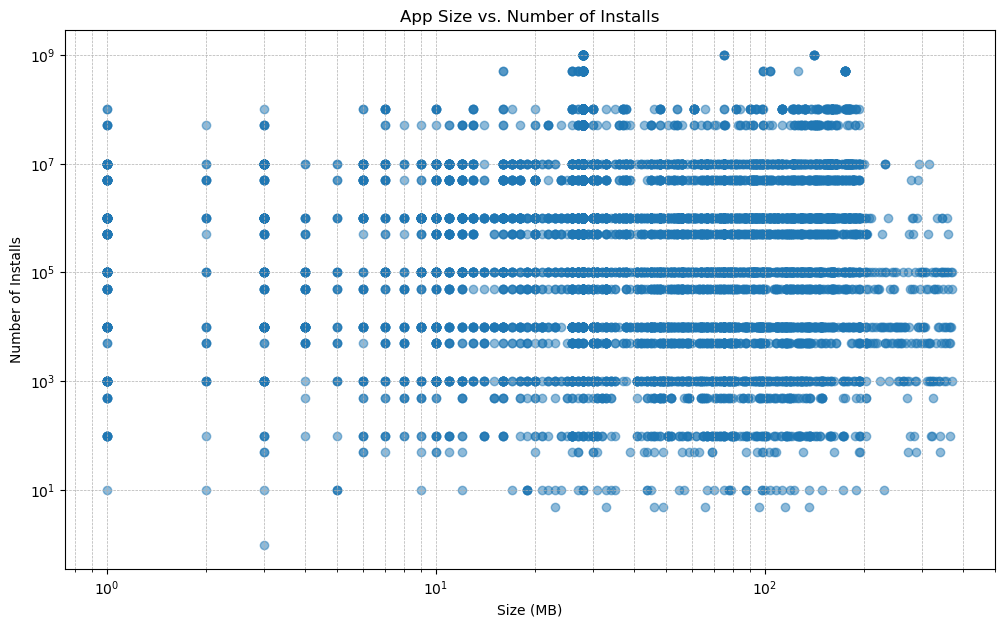

In [43]:
plt.figure(figsize=(12, 7))
plt.scatter(playstore['Size'], playstore['Installs'], alpha=0.5)
plt.xscale('log') 
plt.yscale('log')
plt.xlabel("Size (MB)")
plt.ylabel("Number of Installs")
plt.title("App Size vs. Number of Installs")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

# Data Cleaning: Handling App Sizes

The Size column in the Google Play Store dataset contains values in different formats (e.g., "19M", "500k", "Varies with device"). To ensure consistency, we convert all sizes to a standard numerical format in megabytes (MB).

In [44]:
def convert_size(size):
    if size == 'Varies with device':
        return np.nan
    elif 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) / 1024  # Convert KB to MB
    else:
        return np.nan

playstore['Size'] = playstore['Size'].astype(str).apply(convert_size)
playstore.dropna(subset=['Size'], inplace=True)


# Code Explanation

convert_size(size) → A function that processes app sizes:

1. Returns NaN if the size is "Varies with device".

2. Removes the "M" suffix and converts values to float for sizes in megabytes.

3. Converts sizes in kilobytes (marked with "k") to megabytes (1 kB = 1/1024 MB).

4. Returns NaN for any unexpected values.

5. playstore['Size'] = playstore['Size'].astype(str).apply(convert_size):

Applies the conversion function to the Size column.

6. playstore.dropna(subset=['Size'], inplace=True):

Drops rows where size information is missing after conversion.

In [45]:
print(playstore['Size'].dtype)  # Should be float
print(playstore[['Size', 'Installs']].head())

float64
   Size    Installs
0  19.0     10000.0
1  14.0    500000.0
2   8.7   5000000.0
3  25.0  50000000.0
4   2.8    100000.0


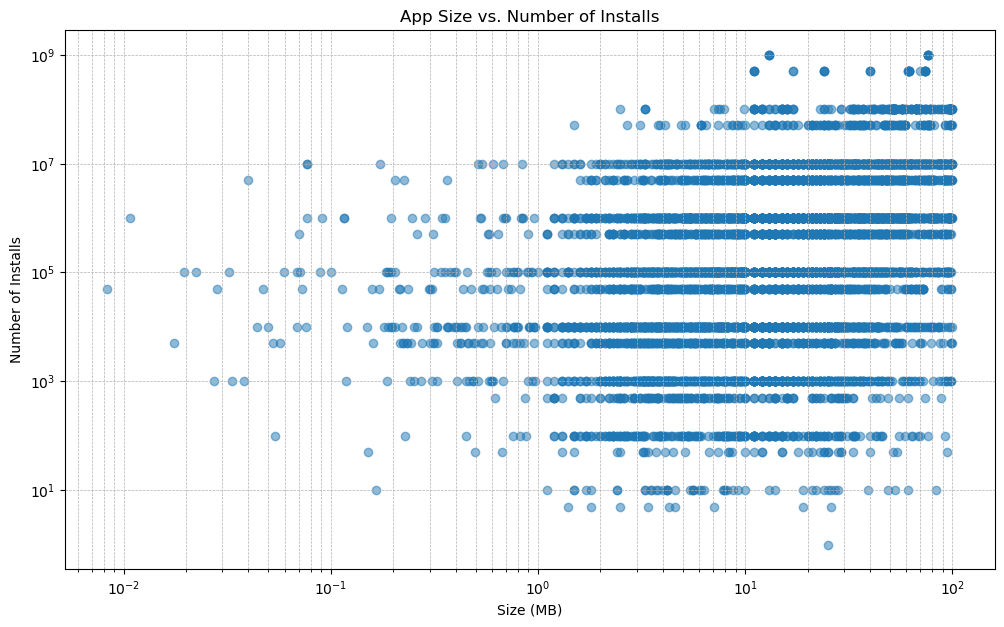

In [46]:
plt.figure(figsize=(12, 7))
plt.scatter(playstore['Size'], playstore['Installs'], alpha=0.5)
plt.xscale('log')  # Log scale for better visualization
plt.yscale('log')
plt.xlabel("Size (MB)")
plt.ylabel("Number of Installs")
plt.title("App Size vs. Number of Installs")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

# Explanation:

1. plt.scatter() creates a scatter plot with app size on the x-axis and number of installs on the y-axis.

2. plt.xscale('log') & plt.yscale('log') convert both axes to a logarithmic scale to handle large variations.

3. alpha=0.5 makes overlapping points more visible.

4. plt.grid() improves readability by adding grid lines.

Note: A modified version of this code was tested to improve visualization clarity, but the core analysis remains the same.

# Appstore data visualization

# Distribution of App Ratings (App Store)

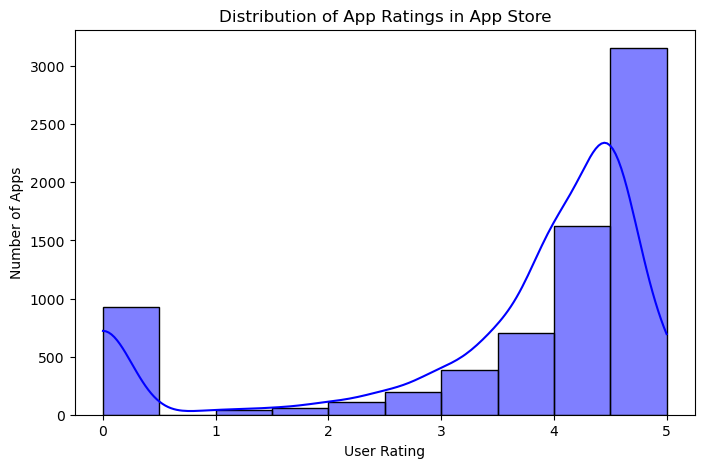

In [47]:
plt.figure(figsize=(8,5))
sns.histplot(appstore['user_rating'], bins=10, kde=True, color='blue')
plt.xlabel("User Rating")
plt.ylabel("Number of Apps")
plt.title("Distribution of App Ratings in App Store")
plt.show()

# Explanation:

1. plt.figure(figsize=(8,5)) → Sets the figure size for better visibility.

2. sns.histplot() → Creates a histogram to show the distribution of app ratings.

3. appstore['User Rating'].dropna() → Drops missing values to avoid errors.

4. bins=10 → Divides ratings into 10 intervals.

5. kde=True → Adds a Kernel Density Estimate (KDE) curve to show the probability distribution.

6. color='blue' → Sets the histogram color to blue.

7. plt.xlabel() and plt.ylabel() → Label the x-axis and y-axis.

8. plt.title() → Adds a title to the plot.

9. plt.show() → Displays the plot.

# Insights:

1. Most apps have ratings between 3.5 and 5.0, suggesting that higher-rated apps dominate the App Store.

2. The distribution is right-skewed, indicating that very few apps receive extremely low ratings.

3. The KDE curve helps visualize the peak, showing where most app ratings are concentrated.

# App Price vs. User Ratings (App Store)

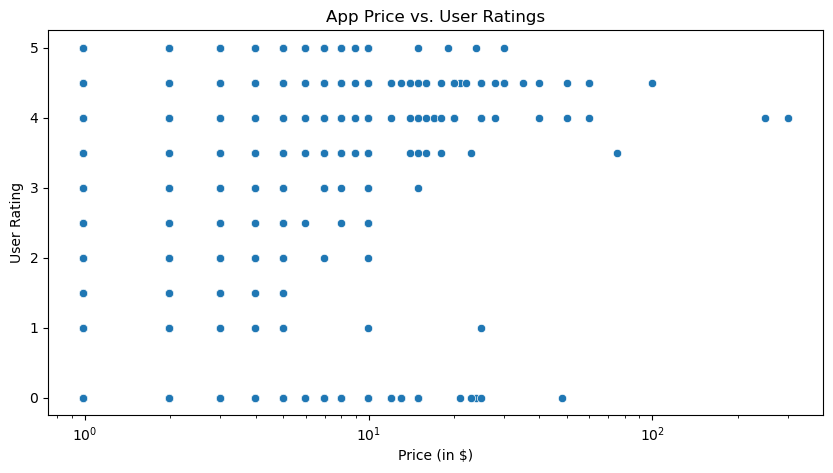

In [48]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=appstore['price'], y=appstore['user_rating'])
plt.xlabel("Price (in $)")
plt.ylabel("User Rating")
plt.title("App Price vs. User Ratings")
plt.xscale("log")  # Log scale to handle outliers
plt.show()

# Explanation:

1. plt.figure(figsize=(10,5)) → Sets the figure size for better visualization.

2. sns.scatterplot() → Creates a scatter plot to analyze the relationship between app price and user rating.

3. x=appstore['price'] → Sets the x-axis as the app price.

4. y=appstore['user_rating'] → Sets the y-axis as the user rating.

5. plt.xlabel() and plt.ylabel() → Labels the x-axis and y-axis.

6. plt.title() → Adds a title to the plot.

7. plt.xscale("log") → Uses a logarithmic scale to better visualize the price variations and reduce the impact of outliers.

8. plt.show() → Displays the plot.

# Insights:

☑ Majority of Apps Are Free or Low-Priced:

1. Most data points are concentrated near $0-$10, indicating that a significant number of apps in the App Store are free or priced low.

2. Paid apps with higher prices are relatively rare.

☑ No Clear Relationship Between Price and User Ratings:

1. The scatter plot does not show a strong upward or downward trend, indicating that higher-priced apps do not necessarily have higher ratings.

2. Some free apps have excellent ratings (4.5 - 5.0), while some expensive apps have lower ratings.

☑ Highly Priced Apps Have Fewer Ratings:

1. Apps priced above $50 tend to have fewer ratings. This suggests that users are less likely to purchase and rate expensive apps.

2. Free and low-cost apps generally receive a higher number of reviews due to their accessibility.

☑ Outliers Exist at Higher Price Points:

1. A few apps priced above $100 exist in the dataset, but their user ratings are scattered.

2. This indicates that some niche or premium apps exist, but their success is not guaranteed.


# App Size vs. User Ratings (App Store)

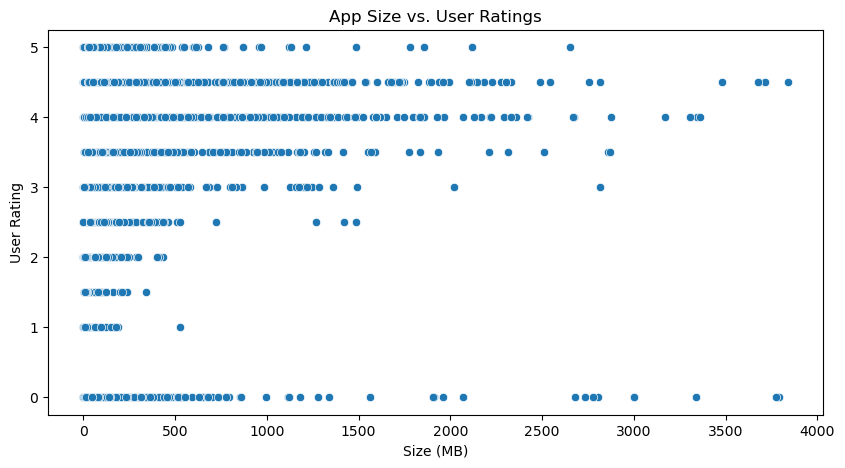

In [49]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=appstore['size_bytes'] / (1024*1024), y=appstore['user_rating'])  # Convert bytes to MB
plt.xlabel("Size (MB)")
plt.ylabel("User Rating")
plt.title("App Size vs. User Ratings")
plt.show()

# Explanation:

1. plt.figure(figsize=(10,5)) → Sets the figure size for better visualization.

2. sns.scatterplot() → Creates a scatter plot to analyze the relationship between app size and user rating.

3. x=appstore['size_bytes'] / (1024*1024) → Converts app size from bytes to megabytes (MB) for easier interpretation.

4. y=appstore['user_rating'] → Sets the y-axis as the user rating.

5. plt.xlabel("Size (MB)") and plt.ylabel("User Rating") → Labels the x-axis and y-axis.

6. plt.title("App Size vs. User Ratings") → Adds a title to the plot.

7. plt.show() → Displays the plot.

# Insights:

✅ Most apps are under 500MB, suggesting that developers optimize apps to ensure smooth performance and compatibility with various devices.

✅ There is no strong correlation between app size and user ratings—both small and large apps receive a mix of high and low ratings. This indicates that app quality, functionality, and user experience matter more than just size.

✅ Larger apps (>1GB) tend to have higher ratings, possibly because they include advanced graphics, richer content, or premium features that enhance user satisfaction. These could be high-end games, professional tools, or multimedia apps.

✅ Small-sized apps (below 100MB) also have high ratings, showing that well-designed lightweight apps can deliver excellent user experiences, especially in categories like utility apps, social media, and productivity tools.

✅ Some low-rated apps are found across all size ranges, indicating that factors such as bugs, poor UI/UX, excessive ads, or lack of updates could contribute to negative ratings, regardless of the app’s size.

✅ There are a few outliers where very large apps (>2GB) have lower ratings, which might be due to storage concerns, performance issues, or high battery consumption affecting user satisfaction.



# Distribution of Apps Across Categories in the App Store

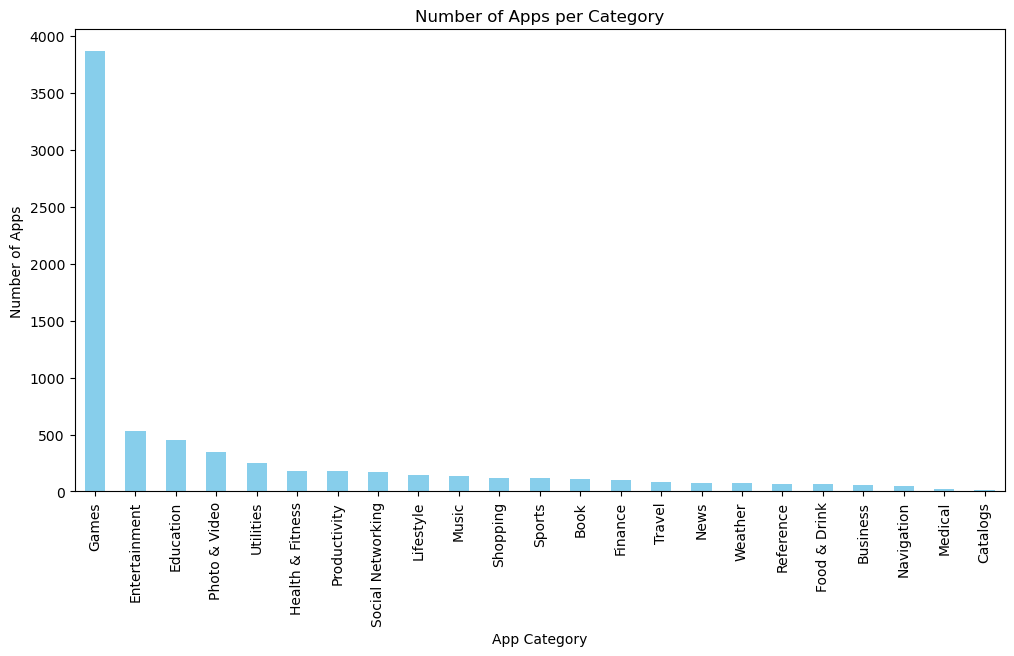

In [50]:
plt.figure(figsize=(12,6))
appstore['prime_genre'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel("App Category")
plt.ylabel("Number of Apps")
plt.title("Number of Apps per Category")
plt.xticks(rotation=90)
plt.show()

# Code Explanation

1. plt.figure(figsize=(12,6)) → Creates a figure of size 12x6 inches to ensure readability.

2. appstore['prime_genre'].value_counts().plot(kind='bar', color='skyblue') →

appstore['prime_genre'].value_counts() → Counts the number of apps in each category.

.plot(kind='bar', color='skyblue') → Generates a bar chart with bars in sky blue color.

3. plt.xlabel("App Category") → Labels the x-axis as "App Category."

4. plt.ylabel("Number of Apps") → Labels the y-axis as "Number of Apps."

5. plt.title("Number of Apps per Category") → Sets the title for the visualization.

6. plt.xticks(rotation=90) → Rotates x-axis labels by 90 degrees to enhance readability.

7. plt.show() → Displays the bar chart.

# Insights:

✅ Entertainment and Gaming Dominate the App Store:

1. The Games and Entertainment categories have the highest number of apps, suggesting that users have a strong preference for leisure and entertainment content.

✅ Utility and Productivity Apps Are Less Common:

2. Categories like Business, Productivity, and Finance have significantly fewer apps compared to entertainment-related categories, indicating a smaller but possibly more niche and high-value market.


✅ Educational and Health Apps Show Steady Growth:

3. The Education and Health & Fitness categories have a notable presence, reflecting the increasing demand for e-learning tools and fitness apps.

✅ Fewer Apps in Specialized Categories:

5. Categories like Medical, Catalogs, and Weather have the lowest number of apps, suggesting that these areas may have less competition but might still be valuable for developers targeting specific audiences.

✅ Potential Opportunities in Underrepresented Categories:

6. Since some categories have fewer apps, developers may find opportunities to create unique, high-quality apps in these spaces.

# Free vs. Paid Apps in the App Store

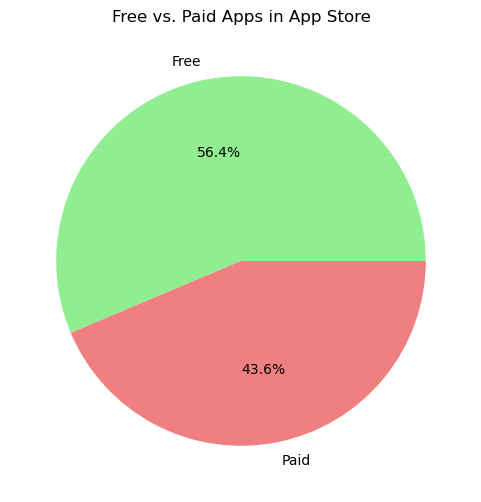

In [51]:
plt.figure(figsize=(6,6))
appstore['is_paid'] = appstore['price'].apply(lambda x: 'Paid' if x > 0 else 'Free')
appstore['is_paid'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.ylabel('')
plt.title("Free vs. Paid Apps in App Store")
plt.show()

# Code Explanation:

1. appstore['is_paid'] = appstore['price'].apply(lambda x: 'Paid' if x > 0 else 'Free') → Creates a new column that categorizes apps as 'Paid' or 'Free' based on their price.

2. appstore['is_paid'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral']) → Generates a pie chart showing the percentage of free vs. paid apps.

3. kind='pie' → Specifies a pie chart.

4. autopct='%1.1f%%' → Displays percentages with one decimal place.

5. colors=['lightgreen', 'lightcoral'] → Uses different colors for free and paid apps.

6. plt.ylabel('') → Removes the y-axis label for a cleaner look.

7. plt.title("Free vs. Paid Apps in App Store") → Adds a title to the plot.

8. plt.show() → Displays the pie chart.

# Insights:
    
☑️ Majority of Apps Are Free:

1. A significant portion of apps in the App Store are free, making up the majority of the dataset.

2. This aligns with common trends where developers offer free apps with in-app purchases or advertisements.

☑️ Paid Apps Are Less Common:

1. Only a small fraction of apps require an upfront payment.

2. These apps are usually premium applications or niche products.

☑️ Freemium Model Dominates the Market:

1. Many free apps use in-app purchases or ads to generate revenue rather than charging an upfront fee.

2. This business model is widely preferred as it attracts more users.

# 📌 Conclusion:

Through our data analysis and visualizations, we uncovered key insights about mobile app trends in both the Google Play Store and the Apple App Store datasets. Here are the major takeaways:

✅ Google Play Store Insights:

1. Top App Categories: Certain categories like "Game" and "Entertainment" dominate the Play Store in terms of app count and user engagement.

2. App Ratings Distribution: Most apps have a rating between 4.0 and 4.5, indicating overall positive user experiences.

3. App Pricing Trends: The vast majority of apps are free, with only a small percentage being paid.

4. Impact of App Size: Larger apps don’t necessarily get more downloads, but mid-sized apps (~20-50MB) seem to perform well.

5. Content Ratings: Most apps are rated for general audiences, with fewer apps targeting mature users.

✅ Apple App Store Insights:

1. Popular Categories: "Games," "Business," and "Education" categories have a high number of apps.

2. Free vs. Paid Apps: Similar to the Play Store, free apps dominate the App Store.

3. Price vs. Ratings: Higher-priced apps don’t always get better ratings. Free apps tend to have higher engagement and better reviews.

4. App Size & User Ratings: No clear correlation between app size and user ratings, suggesting other factors influence user experience.

This project conducted an exploratory data analysis (EDA) on mobile applications from both the Google Play Store and the Apple App Store, providing key insights into market trends, app characteristics, and user preferences.

🔹 Key Findings:

✔ Free Apps Dominate – A significant majority of apps in both stores are free, with monetization strategies likely relying on ads and in-app purchases.

✔ Top Categories Vary – The most popular categories differ between platforms, with gaming being prominent across both.

✔ Ratings Distribution – Most apps have ratings between 4.0 - 5.0, suggesting users tend to rate positively.

✔ Size vs. Installs – Larger apps don’t necessarily get more installs; usability and functionality may be more critical.

✔ Price vs. Ratings – Expensive apps do not guarantee higher ratings; free apps with quality content tend to perform better.

These insights are valuable for developers, businesses, and marketers aiming to optimize their app strategies based on real-world data trends.

